In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [3]:
card_info = pd.read_csv("/content/cc_info.csv")
transactions_info = pd.read_csv("/content/transactions.csv")

In [4]:
card_info.head()

,credit_card,city,state,zipcode,credit_card_limit
0,1280981422329509,Dallas,PA,18612,6000
1,9737219864179988,Houston,PA,15342,16000
2,4749889059323202,Auburn,MA,1501,14000
3,9591503562024072,Orlando,WV,26412,18000
4,2095640259001271,New York,NY,10001,20000


In [5]:
transactions_info.head()

,credit_card,date,transaction_dollar_amount,Long,Lat
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719


In [7]:
card_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   credit_card        984 non-null    int64 
 1   city               984 non-null    object
 2   state              984 non-null    object
 3   zipcode            984 non-null    int64 
 4   credit_card_limit  984 non-null    int64 
dtypes: int64(3), object(2)
memory usage: 38.6+ KB


In [8]:
transactions_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 175119 entries, 0 to 175118
Data columns (total 5 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   credit_card                175119 non-null  int64  
 1   date                       175119 non-null  object 
 2   transaction_dollar_amount  175119 non-null  float64
 3   Long                       175119 non-null  float64
 4   Lat                        175119 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 6.7+ MB


In [9]:
card_info.describe()

,credit_card,zipcode,credit_card_limit
count,9.840000e+02,984.000000,984.000000
mean,5.410432e+15,17895.316057,12321.138211
std,2.545234e+15,23778.651105,7398.449174
min,1.003715e+15,690.000000,2000.000000
25%,3.316062e+15,3280.000000,7000.000000
50%,5.365218e+15,5820.000000,10000.000000
75%,7.562153e+15,18101.250000,16000.000000
max,9.999757e+15,98401.000000,55000.000000


In [10]:
transactions_info.describe()

,credit_card,transaction_dollar_amount,Long,Lat
count,1.751190e+05,175119.000000,175119.000000,175119.000000
mean,3.631341e+15,85.573280,-75.970807,41.110298
std,1.494713e+15,125.289999,20.156553,5.083127
min,1.003715e+15,0.010000,-179.363910,-68.046553
25%,2.260532e+15,29.740000,-80.202324,40.597483
50%,3.736320e+15,57.550000,-72.607437,42.582981
75%,4.933911e+15,98.780000,-72.088856,43.182783
max,6.161580e+15,999.960000,179.917513,78.914330


In [6]:
card_info.isnull().sum()

,0
credit_card,0
city,0
state,0
zipcode,0
credit_card_limit,0


In [11]:
transactions_info.isnull().sum()

,0
credit_card,0
date,0
transaction_dollar_amount,0
Long,0
Lat,0


In [12]:
len(card_info)

984

In [13]:
len(transactions_info)

175119

**EDA**

In [14]:
combined_data = transactions_info.merge(card_info, how = 'left', on = 'credit_card')

In [15]:
combined_data.head()

,credit_card,date,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit
0,1003715054175576,2015-09-11 00:32:40,43.78,-80.174132,40.267370,Houston,PA,15342,20000
1,1003715054175576,2015-10-24 22:23:08,103.15,-80.194240,40.180114,Houston,PA,15342,20000
2,1003715054175576,2015-10-26 18:19:36,48.55,-80.211033,40.313004,Houston,PA,15342,20000
3,1003715054175576,2015-10-22 19:41:10,136.18,-80.174138,40.290895,Houston,PA,15342,20000
4,1003715054175576,2015-10-26 20:08:22,71.82,-80.238720,40.166719,Houston,PA,15342,20000


In [16]:
combined_data.shape

(175119, 9)

In [17]:
combined_data['date'] = pd.to_datetime(combined_data['date'])

In [18]:
combined_data['date_only'] = combined_data['date'].dt.strftime("%Y/%m/%d")
combined_data['time_only'] = combined_data['date'].dt.strftime("%H:%M:%S")
combined_data['hour_only'] = combined_data['date'].dt.strftime("%H")
combined_data['day_of_the_week'] = combined_data['date'].dt.strftime('%A')
combined_data['num_day'] = combined_data['date'].dt.strftime('%w')
combined_data['month_only'] = combined_data['date'].dt.strftime('%m')
combined_data['year_only'] = combined_data['date'].dt.strftime('%Y')

In [19]:
combined_data =  combined_data.drop('date', axis = 1)

In [20]:
combined_data['time_only'] = combined_data['time_only'].replace('00','24')

In [21]:
combined_data.head()

,credit_card,transaction_dollar_amount,Long,Lat,city,state,zipcode,credit_card_limit,date_only,time_only,hour_only,day_of_the_week,num_day,month_only,year_only
0,1003715054175576,43.78,-80.174132,40.267370,Houston,PA,15342,20000,2015/09/11,00:32:40,00,Friday,5,09,2015
1,1003715054175576,103.15,-80.194240,40.180114,Houston,PA,15342,20000,2015/10/24,22:23:08,22,Saturday,6,10,2015
2,1003715054175576,48.55,-80.211033,40.313004,Houston,PA,15342,20000,2015/10/26,18:19:36,18,Monday,1,10,2015
3,1003715054175576,136.18,-80.174138,40.290895,Houston,PA,15342,20000,2015/10/22,19:41:10,19,Thursday,4,10,2015
4,1003715054175576,71.82,-80.238720,40.166719,Houston,PA,15342,20000,2015/10/26,20:08:22,20,Monday,1,10,2015


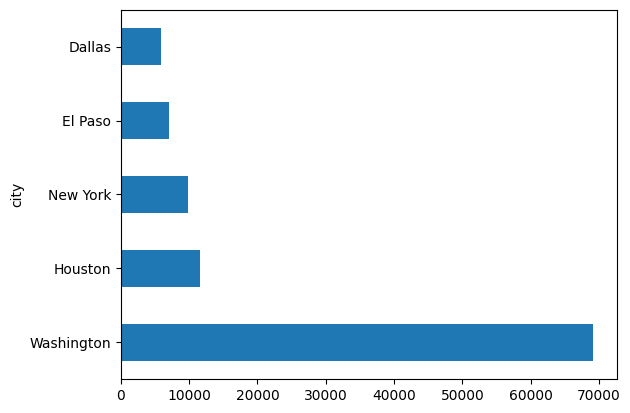

In [22]:
combined_data.city.value_counts().head().plot.barh()
plt.show()

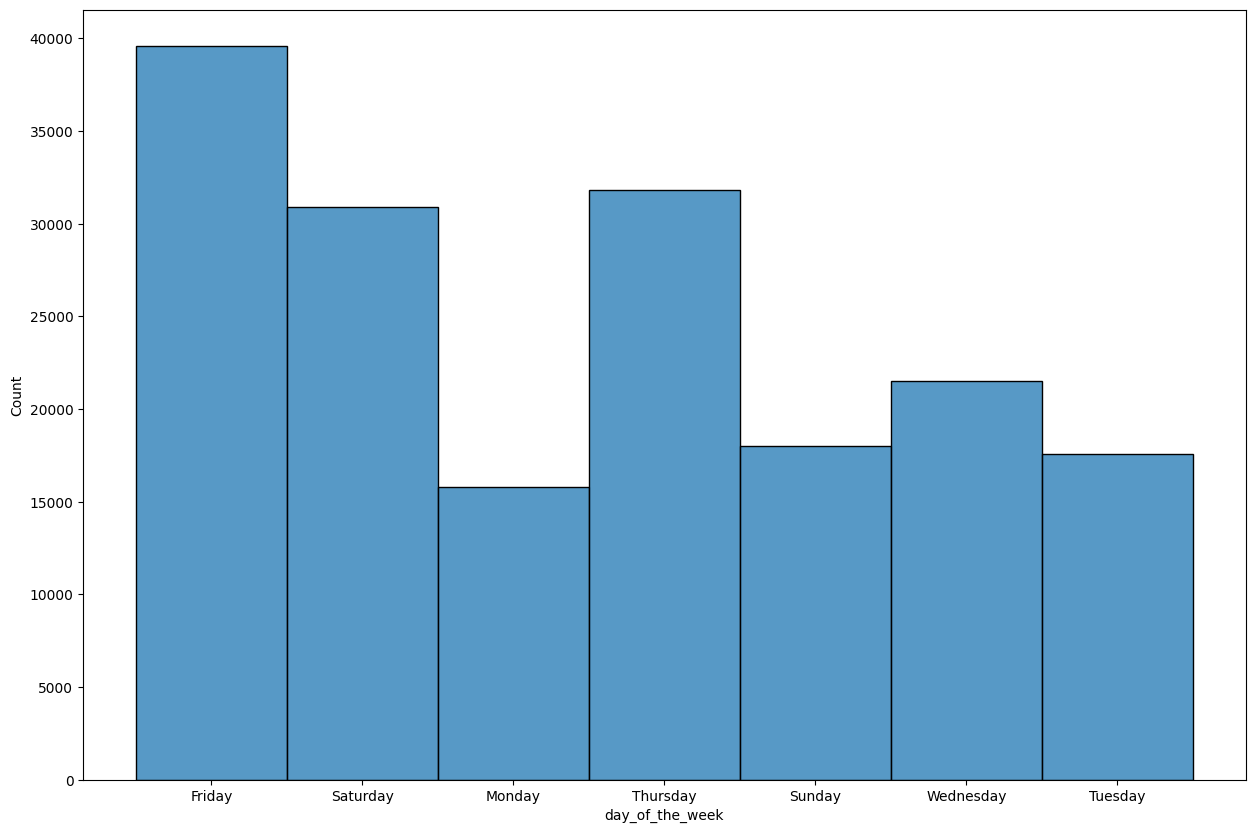

In [23]:
plt.figure(figsize = [15,10])
sns.histplot(data = combined_data, x= 'day_of_the_week')
plt.show()

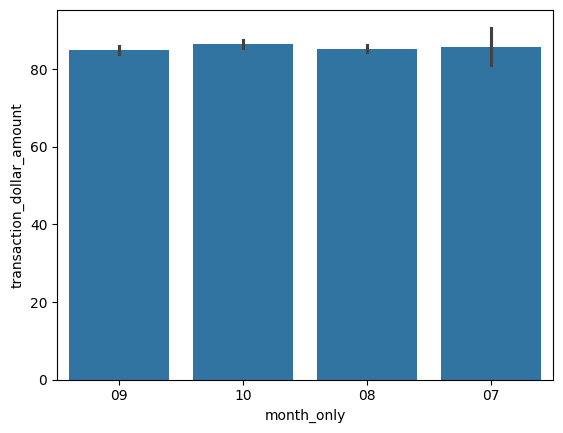

In [24]:
sns.barplot(data = combined_data, x = 'month_only', y= 'transaction_dollar_amount')
plt.show()

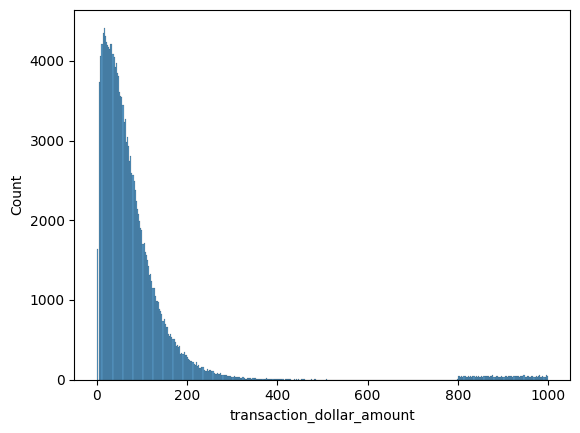

In [25]:
sns.histplot(data = combined_data, x= 'transaction_dollar_amount')
plt.show()

In [26]:
numeric_cols = []

for col in combined_data.columns:
    if pd.api.types.is_numeric_dtype(combined_data[col]):
        numeric_cols.append(col)

In [27]:
correlation_matrix = combined_data[numeric_cols].corr()

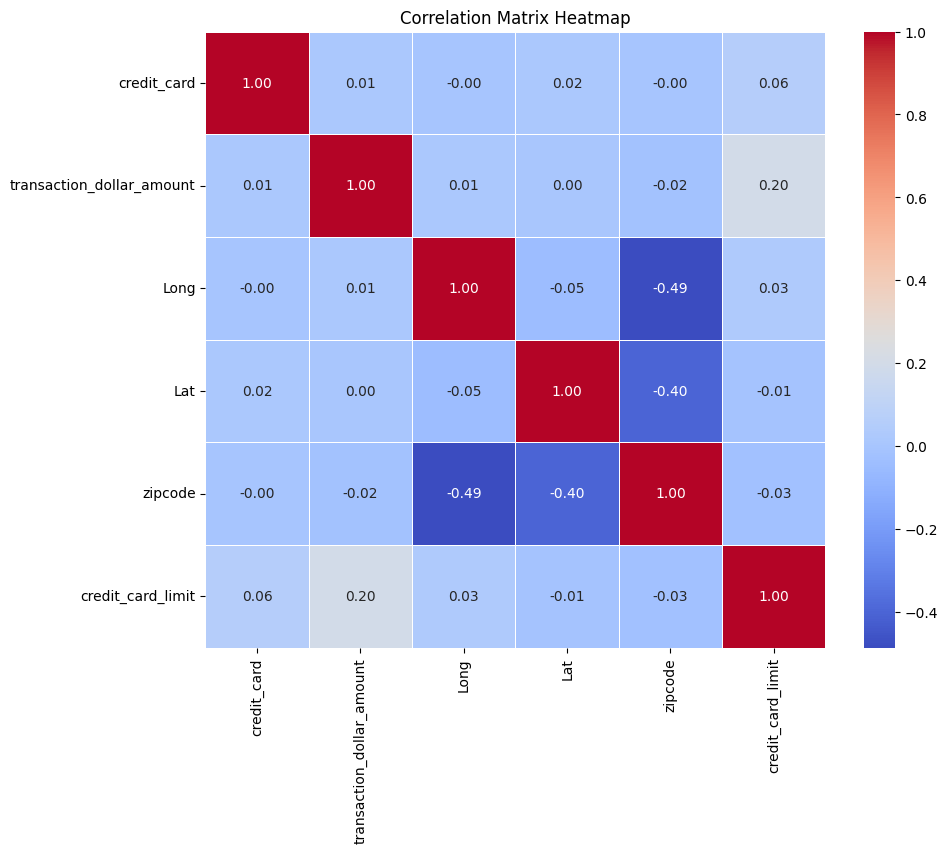

In [28]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [29]:
X_train, X_test = train_test_split(combined_data, test_size =0.2, random_state = 42)

In [30]:
enc = LabelEncoder()

# Fit the encoder on the training data and transform it
for col in X_train.columns:
    if X_train[col].dtype == object:
        X_train[col] = enc.fit_transform(X_train[col])

# Transform the test data using the fitted encoder
for col in X_test.columns:
    if X_test[col].dtype == object:
        X_test[col] = enc.fit_transform(X_test[col])

In [31]:
enc_numeric = StandardScaler()
X_train[numeric_cols] = enc_numeric.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = enc_numeric.fit_transform(X_test[numeric_cols])

In [32]:
model = KMeans(n_clusters= 3)
model.fit(X_train)

KMeans(n_clusters=3)

In [33]:
pred = model.predict(X_test)
pred

array([1, 1, 1, ..., 2, 1, 2], dtype=int32)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but PCA was fitted with feature names
  warnings.warn(


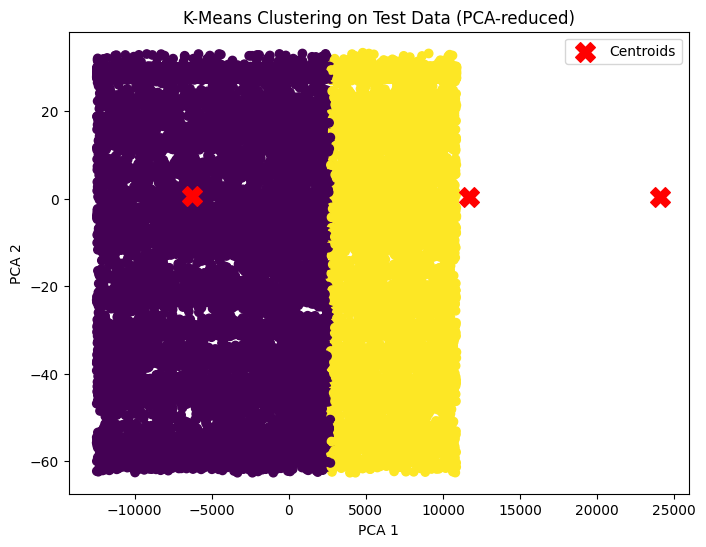

In [34]:
pca = PCA(n_components=2)

X_test_2d = pca.fit_transform(X_test)
centroids_2d = pca.transform(model.cluster_centers_)

plt.figure(figsize=(8, 6))

plt.scatter(X_test_2d[:, 0], X_test_2d[:, 1], c=pred, cmap='viridis', marker='o')


plt.scatter(centroids_2d[:, 0], centroids_2d[:, 1], c='red', s=200, marker='X', label='Centroids')

plt.title("K-Means Clustering on Test Data (PCA-reduced)")
plt.xlabel("PCA 1")
plt.ylabel("PCA 2")
plt.legend()
plt.show()